In [ ]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from python.faddeev1D3B import ReducedFaddeev1D3B, Faddeev1D3B, MulticomponentRHS

#sp.show_config()
#np.show_config()

### Initialization

In [ ]:
cut_x = 0.3
cut_y = 0.1
gr_x = np.vectorize(lambda x: x**3/(cut_x * cut_x) if x < cut_x else x)
gr_y = np.vectorize(lambda x: x**3/(cut_y * cut_y) if abs(x) < cut_y  else x)

N  = 30
Nb = 30
Ng = 30

masses = [1836.0, 1836.0, 1.0]
regulizers = [0.25, 0.25, 0.03]
rhs =MulticomponentRHS(masses=masses)

pow = 3
map = np.vectorize(lambda x: x**pow if x >= 0 else (-1)**(pow-1)*x**pow)

# Alpha pair
agx = 54*map(np.linspace(-1, 1, N))
agy = 10*map(np.linspace(-1, 1, N))
# Beta pair
bgx = 55*map(np.linspace(-1, 1, Nb))
bgy = 10*map(np.linspace(-1, 1, Nb))
# Gamma pair
ggx = 10*map(np.linspace(-1, 1, Ng))
ggy = 50*map(np.linspace(-1, 1, Ng))

grids = [agx, agy, bgx, bgy, ggx, ggy]

#Faddeev
h = Faddeev1D3B(grids, masses=masses, regulizers=regulizers)
h.init_fhamiltonian()
#Belyaev
hr = ReducedFaddeev1D3B(grids, masses=masses, regulizers=regulizers)
hr.init_fhamiltonian()

In [95]:
#print(h.nMatr.shape)

(10092, 10092)


In [ ]:
#rhs.transforms[1, 2] @ np.vstack([ggx, ggy])

In [32]:
# from itertools import product
# list(product(hr.alpha.spl_x.collocPoints, hr.alpha.spl_y.collocPoints))

In [18]:
np.max(h.rhs.convert_gridpoints(h.beta, h.gamma), axis=1), np.min(h.rhs.convert_gridpoints(h.beta, h.gamma), axis=1)

(array([52.75729981,  9.61573391]), array([-52.75729981,  -9.61573391]))

In [ ]:
#tst = h.rhs.convert_gridpoints(h.beta, h.gamma)

In [24]:
evals, evec = h.exp_hamiltonian(dt=0.001, k=40)
#print(np.sort(evals)[::2])
#print(evec.shape)
revals, revec = hr.exp_hamiltonian(dt=0.001, k=40, which='LM')
#print("=="*40)
#print(np.sort(revals)[::2])


# [-0.63453319+0.j -0.62250161+0.j -0.61108421+0.j -0.60026302+0.j
#  -0.59002472+0.j -0.58035553+0.j -0.5712412 +0.j -0.5626785 +0.j
#  -0.5546598 +0.j -0.54716823+0.j]

[-0.63374087+0.j -0.62332732+0.j -0.61028384+0.j -0.59698778+0.j
 -0.58622638+0.j -0.5802891 +0.j -0.55926995+0.j -0.54246818+0.j
 -0.53576777+0.j -0.52782011+0.j -0.51844618+0.j -0.50682417+0.j
 -0.50408449+0.j -0.50200246+0.j -0.50001536+0.j -0.4992236 +0.j
 -0.49692589+0.j -0.49295955+0.j -0.49265201+0.j -0.49119275+0.j]
[-0.63372931+0.j -0.62337758+0.j -0.61033393+0.j -0.59710498+0.j
 -0.58641742+0.j -0.5804233 +0.j -0.55928228+0.j -0.54232927+0.j
 -0.53601305+0.j -0.52776975+0.j -0.51864811+0.j -0.50677979+0.j
 -0.50376204+0.j -0.5019387 +0.j -0.49990997+0.j -0.49916338+0.j
 -0.49670837+0.j -0.49342061+0.j -0.49243839+0.j -0.49174054+0.j]


In [6]:
print(revals)

[-0.63452107+0.j -0.63452107+0.j -0.62248465+0.j -0.62248465+0.j
 -0.61007838+0.j -0.61007838+0.j]


In [ ]:
#hr = Faddeev1D3B(grids, regulizers=regulizers)
#h.init_fhamiltonian()

#evals, evec = h.precondition_hamiltonian(lE=-0.66, rE=-0.62, debug=True, k=1, ncv=30, which='LM')
#print(evals)

### Plots

/Users/Aleksei_Kornev2/physics/Faddeev/TDFE/venv/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'cvals'


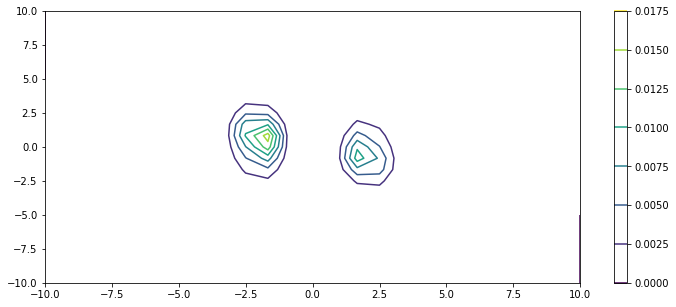

In [10]:
fig = plt.figure(figsize=(12,5))

x = np.linspace(-10, 10, 25)
y = np.linspace(-10, 10, 25)
X, Y = np.meshgrid(x, y)


cvals = np.linspace(0, 1, 100)

n_state = 2
coefs = evec[:, n_state].copy()
#print(np.sum(coefs[:hr.alpha.dim]))
#print(np.zeros(h.alpha.dim))

#print(np.allclose(coefs[:h.alpha.dim], np.zeros(h.alpha.dim), atol=1e-8))
#coefs[h.alpha.dim:] = 0
coefs[:h.alpha.dim] = 0
#coefs[h.alpha.dim+h.beta.dim:] = 0


psi = np.array([[h.splinef(coefs, xi, yi, idx=2) for xi in x] for yi in y])
psi_real = np.real(psi)
psi_imag = np.imag(psi)
psi_ampl = np.abs(psi)

contour1 = plt.contour(X, Y, psi_ampl, cvals=cvals)
fig.colorbar(contour1)

/Users/Aleksei_Kornev2/physics/Faddeev/TDFE/venv/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: The following kwargs were not used by contour: 'cvals'


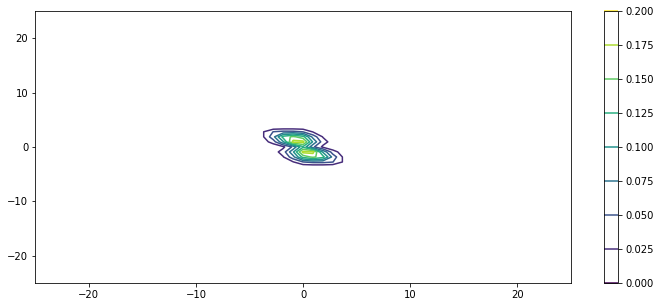

In [5]:
fig = plt.figure(figsize=(12,5))

x = np.linspace(-25, 25, 55)
y = np.linspace(-25, 25, 55)
X, Y = np.meshgrid(x, y)

cvals = np.linspace(0, 1, 100)

coefs = evec[:, n_state].copy()
# coefs[:h.alpha.dim] = 0
# coefs[h.alpha.dim+h.beta.dim:] = 0


psi = np.array([[h.splinef(coefs, xi, yi, idx=1) for xi in x] for yi in y])
psi_real = np.real(psi)
psi_imag = np.imag(psi)
psi_ampl = np.abs(psi)

contour1 = plt.contour(X, Y, psi_ampl, cvals=cvals)
fig.colorbar(contour1)

/Users/Aleksei_Kornev2/physics/Faddeev/TDFE/venv/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: The following kwargs were not used by contour: 'cvals'


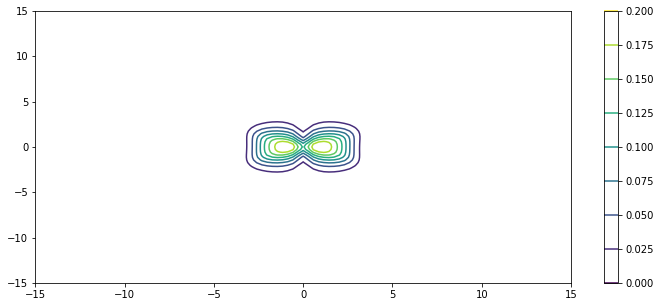

In [6]:
fig = plt.figure(figsize=(12,5))

x = np.linspace(-15, 15, 105)
y = np.linspace(-15, 15, 105)
X, Y = np.meshgrid(x, y)


cvals = np.linspace(0, 1, 100)
n_state = 0
coefs = evec[:, n_state].copy()
#coefs = evec[:, n_state].copy()
#coefs[:h.alpha.dim] = 0
#coefs[h.alpha.dim+h.beta.dim:] = 0


psi = np.array([[h.splinef(coefs, xi, yi, idx=2) for xi in x] for yi in y])
psi_real = np.real(psi)
psi_imag = np.imag(psi)
psi_ampl = np.abs(psi)

contour1 = plt.contour(X, Y, psi_ampl, cvals=cvals)
fig.colorbar(contour1)